# BIOL 419: Final Project

## Question: Which Machine Learning Classifier better predicts if a tumor sample is benign or malignant based on phenotypic data of fine needle aspirate breast tumor samples?

The data in this project is from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

CAMILA FERNANDA VALDBENITO BAEZA  & DIANNE LABOY CINTRON

## Downloading Data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm
from sklearn import datasets
from sklearn import model_selection

%matplotlib inline

In [43]:
#importing the data 
df = pd.read_csv("cancer_data.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
coulmn_drop = ['id', 'Unnamed: 32']
data = df.drop(coulmn_drop, axis=1)
print(data.shape)
data.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration 

In [45]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [46]:
# Exploring data types
print("Data Types")
print("----------------")
data.dtypes

Data Types
----------------


diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [47]:
# Identifying missing data 
print("Missing Rows")
print("----------------")
data.isnull().sum()

Missing Rows
----------------


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [48]:
# Diagnosis colummn results 
print("Possible results for diagnosis column")
print("----------------")
count = data['diagnosis'].value_counts()
print(count)

Possible results for diagnosis column
----------------
B    357
M    212
Name: diagnosis, dtype: int64


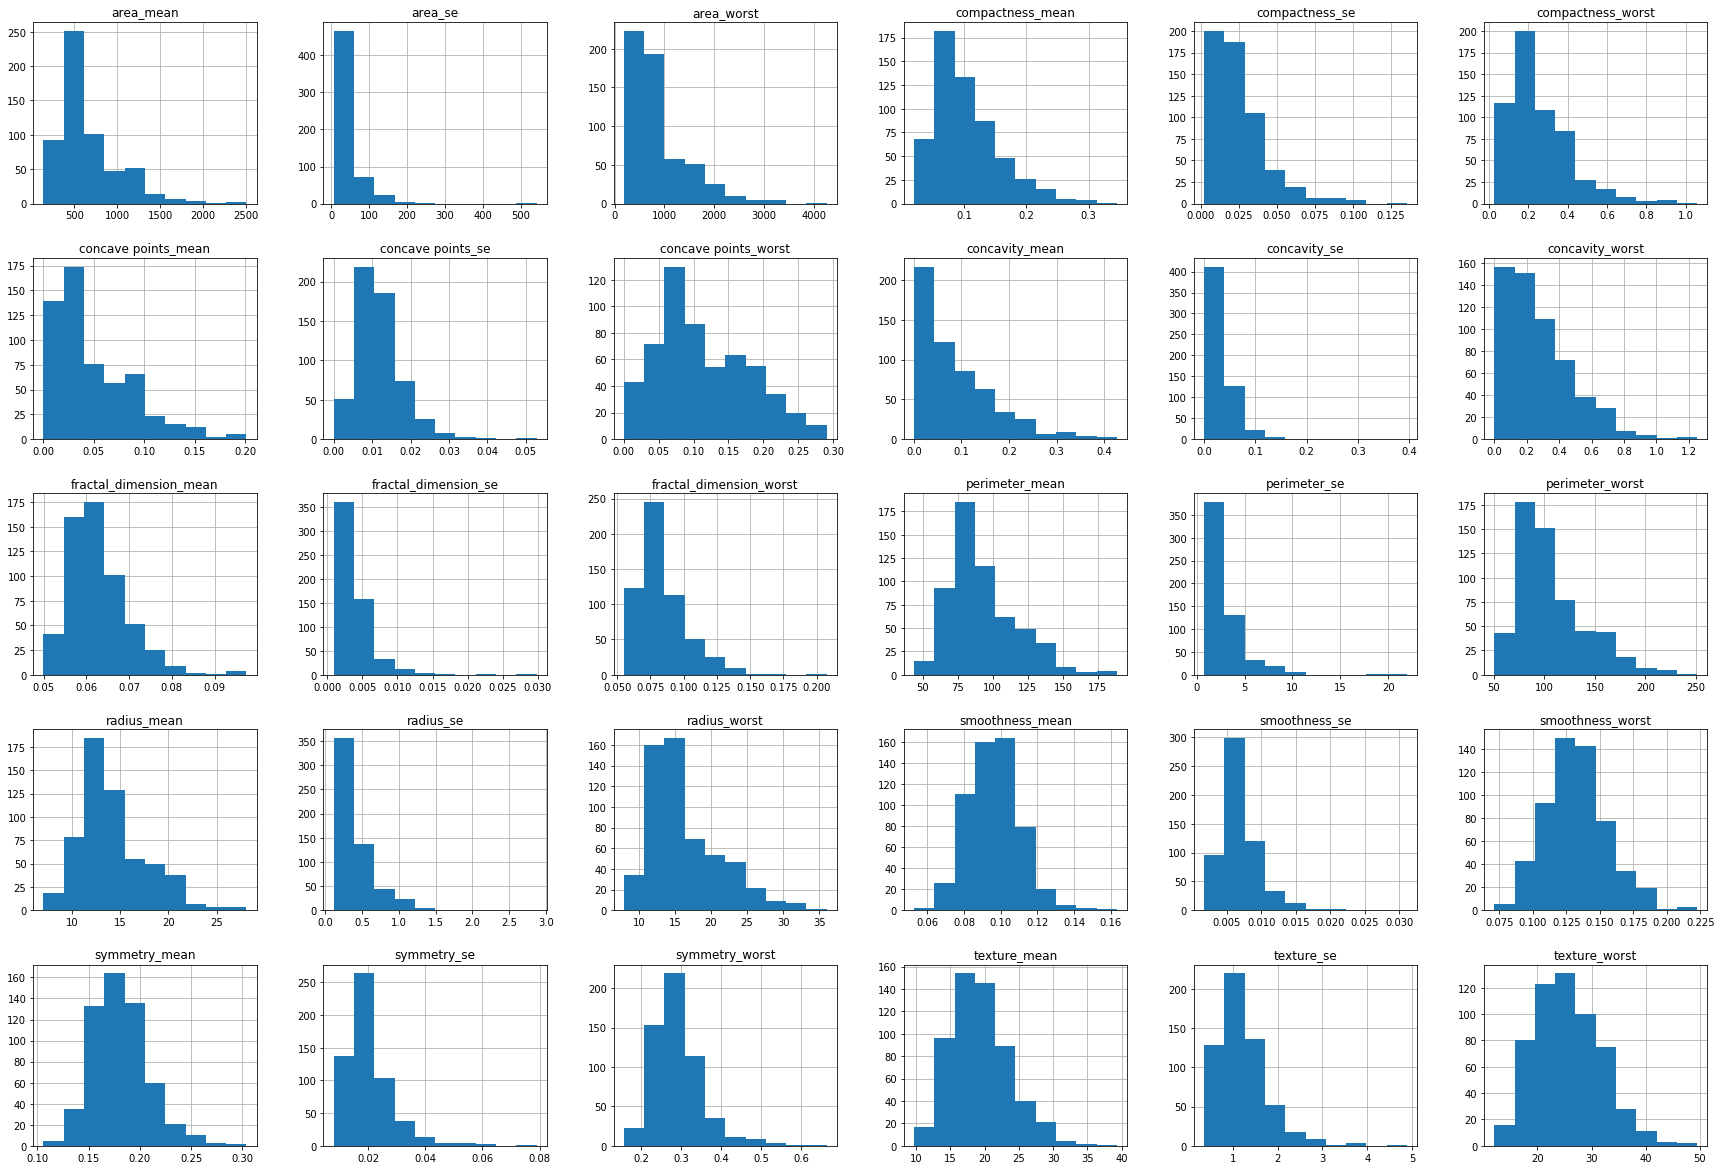

In [49]:
#Creating histograms for numerical features(columns) 
hist = data.hist(figsize=(30,25), layout=(6,6), zorder=2)

AxesSubplot(0.125,0.125;0.62x0.755)


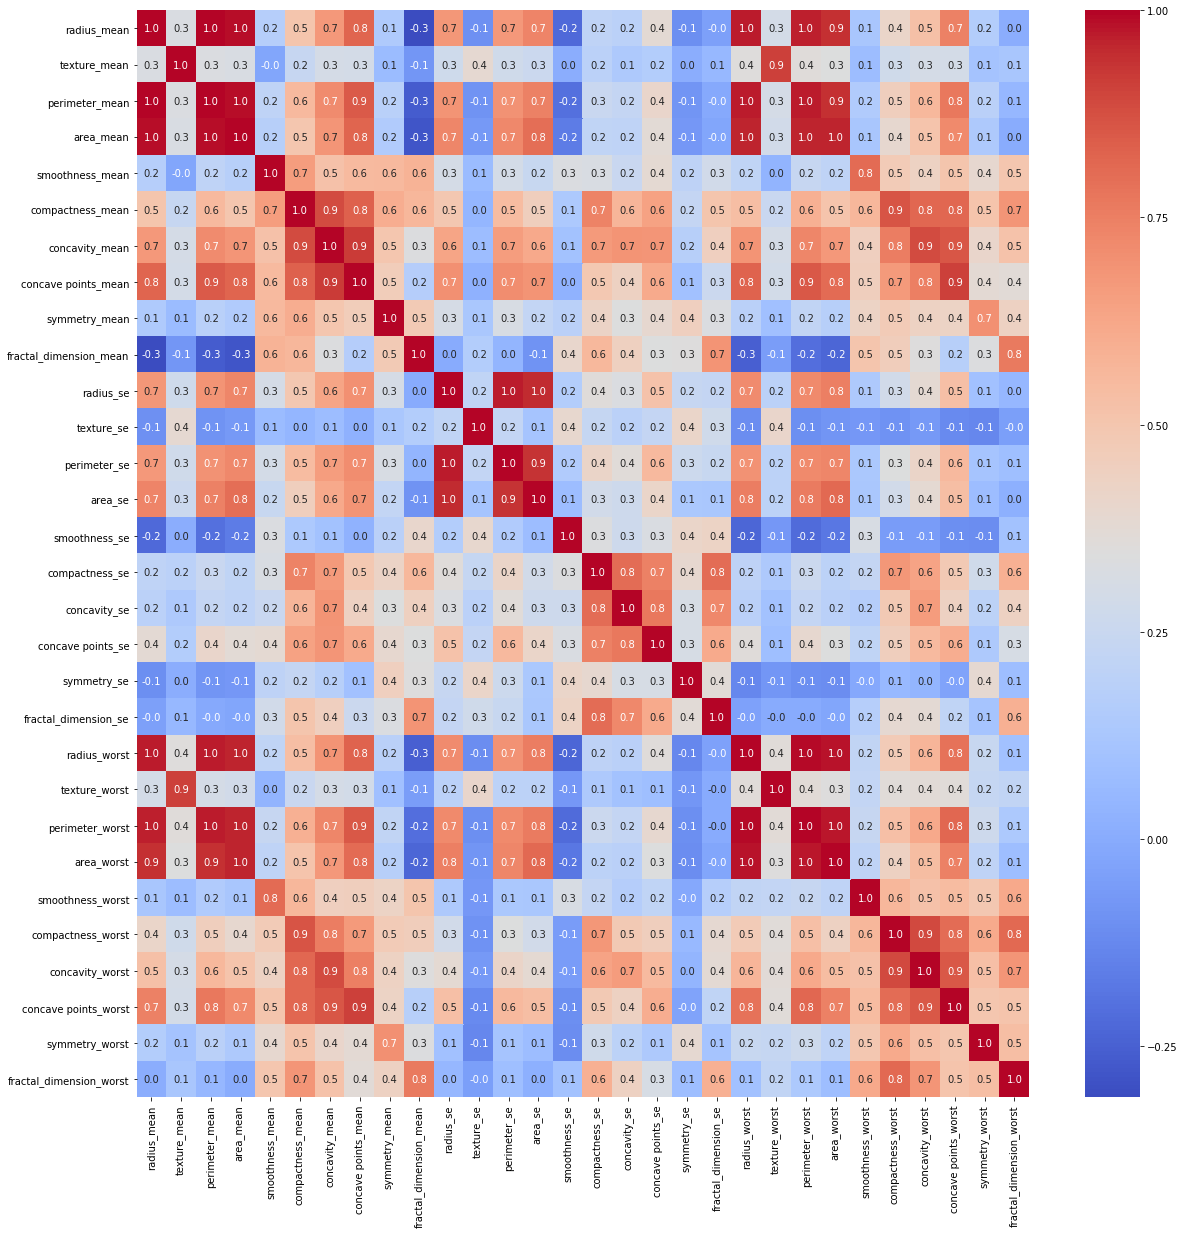

In [50]:
# Correlation analysis
f,ax = plt.subplots(figsize=(20, 20))
print(sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True, fmt= '.1f', ax=ax))

In [51]:
import random
column_names = list(data.columns.values)
column_names_copy = column_names[3:]
random.shuffle(column_names_copy)
column_names[3:] = column_names_copy
column_names = column_names[:6]
print(column_names)

['diagnosis', 'radius_mean', 'texture_mean', 'area_se', 'concavity_worst', 'concave points_mean']


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


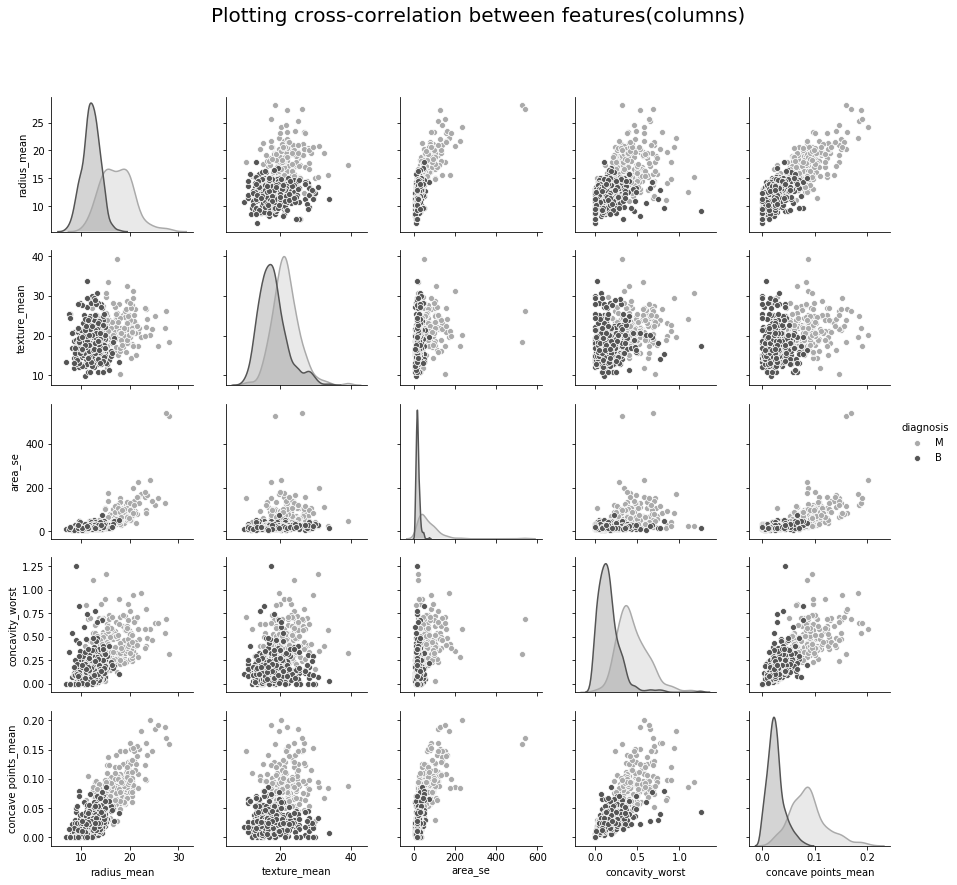

In [52]:
# Plotting cross-correlation between features(columns)
# https://towardsdatascience.com/decision-trees-a-birds-eye-view-and-an-implementation-c91754f0dcd0
# https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid
# g = sns.pairplot(data.iloc[:,:6], hue="diagnosis")
g = sns.pairplot(data[column_names], hue="diagnosis", palette='binary')
g.fig.suptitle("Plotting cross-correlation between features(columns)", size=20)
plt.subplots_adjust(top=0.88)
plt.savefig('cross_correlation.eps', format='eps', dpi=1000)

In [53]:
#plt.savefig('cross_correlation.eps', format='eps', dpi=1000)

## Data Modeling

### Splitting data into trainning and testing sets

In [54]:
# separating training from test data points
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size= 0.3, random_state=0)

train_label = train.diagnosis
train_data = train.drop(['diagnosis'], axis='columns')
train_data.head()

test_label = test.diagnosis
test_data = test.drop(['diagnosis'], axis='columns')

### Logistic Regression

In [55]:
# fitting logistic regression 
from sklearn.linear_model import LogisticRegression 
logistic = LogisticRegression()
logistic.fit(train_data, train_label)
pred_lr = logistic.predict(test_data)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


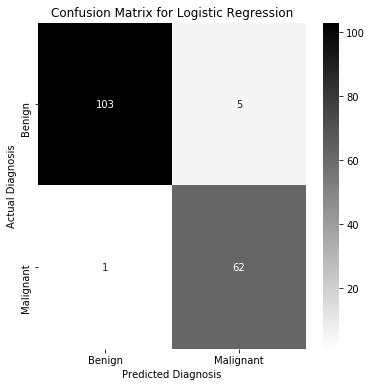

In [56]:
# plotting a confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.figure(figsize=(6,6))
cm_lr = metrics.confusion_matrix(test_label, pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for Logistic Regression")
plt.savefig('CM_LR.eps', format='eps', dpi=1000)
plt.show()

In [57]:
# Calculating F1-scores for Logistic Regression
print("\nCalculating F1-scores for Logistic Regression:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, logistic.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_lr, target_names = target_names))


Calculating F1-scores for Logistic Regression:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       249
   Malignant       0.95      0.93      0.94       149

   micro avg       0.96      0.96      0.96       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.96      0.96       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.99      0.95      0.97       108
   Malignant       0.93      0.98      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Decision Tree

In [58]:
# Fitting decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight = 'balanced')
dtree.fit(X=train_data, y= train_label)

# Predicting label based on testing data
pred_dt = dtree.predict(X = test_data)

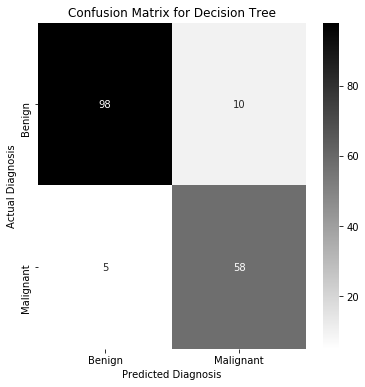

In [78]:
# plotting a confusion matrix 
fig = plt.figure(figsize=(6,6))
cm_dt = metrics.confusion_matrix(test_label, pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for Decision Tree")
plt.savefig('CM_DT.eps', format='eps', dpi=1000)
plt.show()

In [60]:
# Calculating F1-scores for Decision Tree
print("\nCalculating F1-scores for Decision Tree:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, dtree.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_dt, target_names = target_names))


Calculating F1-scores for Decision Tree:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       249
   Malignant       1.00      1.00      1.00       149

   micro avg       1.00      1.00      1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.95      0.91      0.93       108
   Malignant       0.85      0.92      0.89        63

   micro avg       0.91      0.91      0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.91      0.91       171



In [61]:
dtree

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
# Plotting the decision tree 
# https://towardsdatascience.com/decision-trees-a-birds-eye-view-and-an-implementation-c91754f0dcd0
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

#feature_names = list(data)
#feature_names.remove('diagnosis')
#print(feature_names)

#dot_data = StringIO()
#export_graphviz(dtree,out_file=dot_data, feature_names=feature_names, class_names=target_names,  
                #filled=True, rounded=True,
               # special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

## KNN

In [63]:
# fitting and testig KNN with deafult # of neighbors (n=5)
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_data, train_label)

train_score = classifier.score(train_data, train_label)
test_score = classifier.score(test_data, test_label)

print("KNN training score:", train_score, "KNN test score:", test_score)

pred_KNN = classifier.predict(test_data)

KNN training score: 0.9396984924623115 KNN test score: 0.9473684210526315


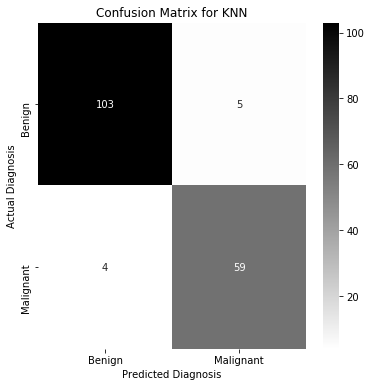

In [64]:
# plotting a confusion matrix for KNN

fig = plt.figure(figsize=(6,6))
cm_dt = metrics.confusion_matrix(test_label, pred_KNN)
sns.heatmap(cm_dt, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for KNN")
plt.savefig('CM_KNN.eps', format='eps', dpi=1000)
plt.show()

In [65]:
# Calculating F1-scores for KNN
print("\nCalculating F1-scores for KNN:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, classifier.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_KNN, target_names = target_names))


Calculating F1-scores for KNN:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95       249
   Malignant       0.93      0.91      0.92       149

   micro avg       0.94      0.94      0.94       398
   macro avg       0.94      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.96      0.95      0.96       108
   Malignant       0.92      0.94      0.93        63

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



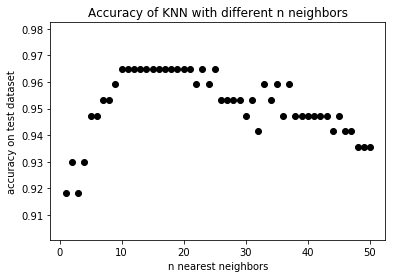

In [66]:
# number of neighbors that increases classifiers accuracy 
def score_n(n):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_data, train_label)
    test_score = classifier.score(test_data, test_label)
    return test_score

ns = np.arange(1, 51)
ts = [score_n(n) for n in ns]
plt.scatter(ns, ts, c='black')
plt.xlabel("n nearest neighbors")
plt.ylabel("accuracy on test dataset")
plt.title("Accuracy of KNN with different n neighbors")
plt.savefig('KNN_accuracy', format='eps', dpi=1000)
plt.show()

In [67]:
# fitting and testig KNN with deafult # of neighbors (n=11)
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(train_data, train_label)

train_score = classifier.score(train_data, train_label)
test_score = classifier.score(test_data, test_label)

print("KNN training score:", train_score, "KNN test score:", test_score)

pred_KNN = classifier.predict(test_data)

KNN training score: 0.9346733668341709 KNN test score: 0.9649122807017544


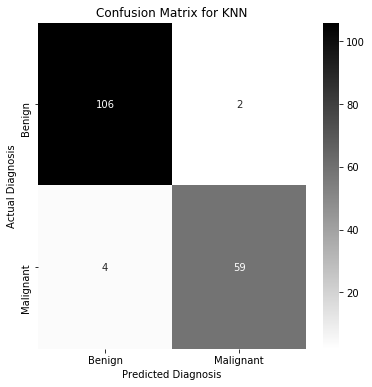

In [68]:
# plotting a confusion matrix for KNN (n=11)

fig = plt.figure(figsize=(6,6))
cm_dt = metrics.confusion_matrix(test_label, pred_KNN)
sns.heatmap(cm_dt, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for KNN")
plt.savefig('CM_KNN11.eps', format='eps', dpi=1000)
plt.show()

In [69]:
# Calculating F1-scores for KNN (n=11)
print("\nCalculating F1-scores for KNN:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, classifier.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_KNN, target_names = target_names))


Calculating F1-scores for KNN:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.95       249
   Malignant       0.94      0.89      0.91       149

   micro avg       0.93      0.93      0.93       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.93      0.93      0.93       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       108
   Malignant       0.97      0.94      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## LDA 

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier_LDA = LinearDiscriminantAnalysis()
classifier_LDA.fit(train_data, train_label)

train_score = classifier_LDA.score(train_data, train_label)
test_score = classifier_LDA.score(test_data, test_label)

print("LDA training score:", train_score, "LDA test score:", test_score)

pred_LDA = classifier_LDA.predict(test_data)

LDA training score: 0.9623115577889447 LDA test score: 0.9707602339181286


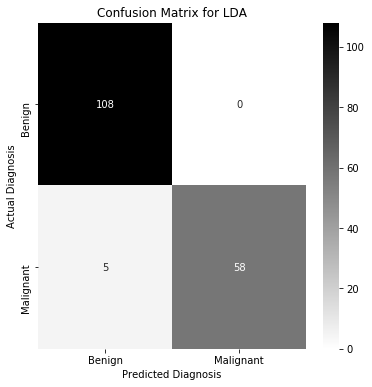

In [71]:
# plotting a confusion matrix for LDA

fig = plt.figure(figsize=(6,6))
cm_dt = metrics.confusion_matrix(test_label, pred_LDA)
sns.heatmap(cm_dt, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for LDA")
plt.savefig('CM_LDA.eps', format='eps', dpi=1000)
plt.show()

In [72]:
# Calculating F1-scores for LDA
print("\nCalculating F1-scores for LDA:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, classifier_LDA.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_LDA, target_names = target_names))


Calculating F1-scores for LDA:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       249
   Malignant       0.99      0.91      0.95       149

   micro avg       0.96      0.96      0.96       398
   macro avg       0.97      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       108
   Malignant       1.00      0.92      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Support Vector Machines

In [73]:
from sklearn import svm

clf_SVM = svm.SVC(gamma='scale', kernel='rbf')
clf_SVM.fit(train_data, train_label)

train_score = clf_SVM.score(train_data, train_label)
test_score = clf_SVM.score(test_data, test_label)

print("SVM training score:", train_score, "SVM test score:", test_score)

pred_SVM = clf_SVM.predict(test_data)

SVM training score: 0.9447236180904522 SVM test score: 0.9590643274853801


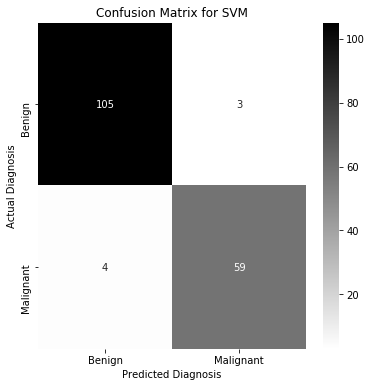

In [74]:
fig = plt.figure(figsize=(6,6))
cm_dt = metrics.confusion_matrix(test_label, pred_SVM)
sns.heatmap(cm_dt, annot=True, fmt="g", cmap='binary', xticklabels =['Benign','Malignant'], yticklabels =['Benign','Malignant'])
plt.ylabel("Actual Diagnosis")
plt.xlabel("Predicted Diagnosis")
plt.title("Confusion Matrix for SVM")
plt.savefig('CM_SVM.eps', format='eps', dpi=1000)
plt.show()

In [75]:
print("\nCalculating F1-scores for SVM:\n")
target_names = ['Benign', 'Malignant']
print("F1-score for training data:")
print(classification_report(train_label, clf_SVM.predict(train_data), target_names = target_names))
print("\nF1-score for testing data:")
print(classification_report(test_label, pred_SVM, target_names = target_names))


Calculating F1-scores for SVM:

F1-score for training data:
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.96       249
   Malignant       0.94      0.91      0.93       149

   micro avg       0.94      0.94      0.94       398
   macro avg       0.94      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398


F1-score for testing data:
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       108
   Malignant       0.95      0.94      0.94        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



ML Classifier: Train Score, Test Score
---------------------------------------
LR: 0.957286, 0.964912
LDA: 0.962312, 0.970760
KNN: 0.939698, 0.947368
DTREE: 1.000000, 0.906433
SVM: 0.944724, 0.959064


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


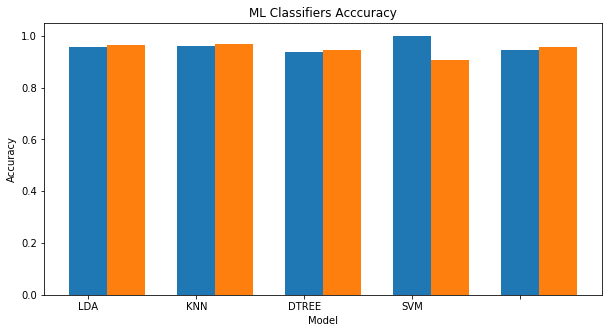

In [76]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('SVM', svm.SVC(gamma='scale', kernel='rbf')))

print('ML Classifier: Train Score, Test Score')
print("---------------------------------------")
train_results = []
test_results = []
names = []
for name, model in models: 
    names.append(name)
    model.fit(train_data, train_label)
    train_score = model.score(train_data, train_label)
    test_score = model.score(test_data, test_label)
    train_results.append(train_score)
    test_results.append(test_score)
    result = "%s: %f, %f" % (name, train_score, test_score)
    print(result)

width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.bar(np.arange(len(models)), train_results, width)
plt.bar(np.arange(len(models))+ width, test_results, width)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('ML Classifiers Acccuracy')
plt.show()

Algorithm: mean accuracy (SD accuracy)
LR: 0.950815 (0.026919)
LDA: 0.959555 (0.029449)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

KNN: 0.926253 (0.046232)
DTREE: 0.928008 (0.032705)
SVM: 0.935025 (0.043677)


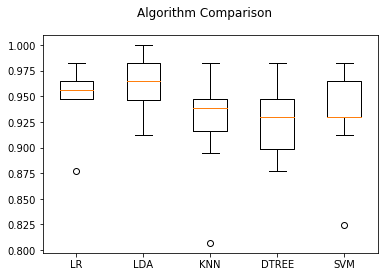

<Figure size 432x288 with 0 Axes>

In [77]:
# compare M achine Learning Classifiers 
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# https://scikit-learn.org/stable/modules/cross_validation.html 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

y = data.diagnosis
X = data.drop(['diagnosis'], axis='columns')
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('SVM', svm.SVC(gamma='scale', kernel='rbf')))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
seed = 5
print('Algorithm: mean accuracy (SD accuracy)')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig('algorithm comparison.eps', format='eps')